In [1]:
import numpy as np

BUILD PROBE VIA SITE MAP FROM NN
---

In [2]:
site_groups = {
    0: {
        'geometry':{
        },
        'sites': [x for x in range(1, 33)]  # 1 to 33
    },
    1: {
        'geometry': {
        },
        'sites': [x for x in range(33, 65)]  # 33 to 64
    }
}

In [3]:
row1 = np.arange(1, 7)
row2 = np.arange(7, 14)
row3 = np.array([14,19,15,18,16,17])
row4 = np.flipud(np.arange(20,27))
row5 = np.flipud(np.arange(27,33))
print (row1.size+row2.size+row3.size+row4.size+row5.size)

32


In [4]:
graph = []
last = None
for i in range(len(row1)):
    s1 = row1[i]
    if i>0:  # same row edge.
        graph.append((row1[i-1], s1))
    for ii in range(i, i+2):
        s2 = row2[ii]
        graph.append((s1,s2))
        
for i in range(len(row2)):
    s1 = row2[i]
    if i>0:  # same row edge.
        graph.append((row2[i-1], s1))
    for ii in range(i-1, i+1):
        if ii >= 0 and ii < len(row3):
            s2 = row3[ii]
            graph.append((s1,s2))
            
for i in range(len(row3)):
    s1 = row3[i]
    if i>0:  # same row edge.
        graph.append((row3[i-1], s1))
    for ii in range(i, i+2):
        s2 = row4[ii]
        graph.append((s1,s2))

for i in range(len(row4)):
    s1 = row4[i]
    if i>0:  # same row edge.
        graph.append((row4[i-1], s1))
    for ii in range(i-1, i+1):
        if ii >= 0 and ii < len(row5):
            s2 = row5[ii]
            graph.append((s1,s2))

for i in range(len(row5)-1):
    graph.append((row5[i], row5[i+1]))
site_groups[0]['graph'] = graph

In [5]:
graph2 = []
for i in graph:
    graph2.append([x+32 for x in i])
site_groups[1]['graph'] = graph2

In [6]:
geometry0 = {}
for i, s in enumerate(row1):
    geometry0[s] = (0, 14+28*i)
for i, s in enumerate(row2):
    geometry0[s] = (14*1, 28*i)
for i, s in enumerate(row3):
    geometry0[s] = (14*2, 14+28*i)
for i, s in enumerate(row4):
    geometry0[s] = (14*3, 28*i)
for i, s in enumerate(row5):
    geometry0[s] = (14*4, 14+28*i)
site_groups[0]['geometry'] = geometry0

geometry1 = {}
for s, v in geometry0.items():
    geometry1[s+32] = (v[0]+200, v[1])
site_groups[1]['geometry'] = geometry1

In [7]:
s_list = '''41
38
43
37
39
36
40
45
42
47
44
49
46
51
48
53
34
64
35
58
62
63
33
56
60
61
54
59
57
52
55
50
10
15
8
13
11
6
5
4
32
9
3
2
30
7
31
1
17
12
19
14
21
16
23
18
25
20
26
29
22
28
24
27'''

In [8]:
s_list.splitlines()
ch_list = [int(x) for x in s_list.splitlines()]
print(ch_list)

[41, 38, 43, 37, 39, 36, 40, 45, 42, 47, 44, 49, 46, 51, 48, 53, 34, 64, 35, 58, 62, 63, 33, 56, 60, 61, 54, 59, 57, 52, 55, 50, 10, 15, 8, 13, 11, 6, 5, 4, 32, 9, 3, 2, 30, 7, 31, 1, 17, 12, 19, 14, 21, 16, 23, 18, 25, 20, 26, 29, 22, 28, 24, 27]


CONVERT TO CHANNELS FROM SITES
-----

In [9]:
SGL_64 = {
    'raw_channels': range(64),
    'Neuronexus': [
        41, 38, 43, 37, 39, 36, 40, 45, 42, 47, 44, 49, 46, 51, 48, 53, 34, 64, 35, 58, 62, 63, 33, 56, 60, 61, 
        54, 59, 57, 52, 55, 50, 10, 15, 8, 13, 11, 6, 5, 4, 32, 9, 3, 2, 30, 7, 31, 1, 17, 12, 19, 14, 21, 16, 
        23, 18, 25, 20, 26, 29, 22, 28, 24, 27
    ],
    'NanoZ': [
        34, 36, 38, 40, 42, 44, 46, 48, 47, 45, 43, 41, 39, 37, 35, 33, 57, 59, 62, 64, 50, 52, 54, 56, 55, 53,
        51, 49, 63, 61, 60, 58, 1, 3, 5, 7, 9, 11, 13, 15, 16, 14, 12, 10, 8, 6, 4, 2, 26, 28, 29, 31, 17, 19, 21,
        23, 24, 22, 20, 18, 32, 30, 27, 25
    ],
    'HIRES_4x16_flipchip': [
        18, 20, 21, 23, 24, 25, 26, 27, 31, 30, 29, 32, 28, 22, 19, 17, 48, 46, 43, 37, 33, 36, 35, 34, 38, 39, 40, 41,
        42, 44, 45, 47, 1, 3, 6, 8, 10, 12, 14, 16, 15, 13, 11, 9, 7, 5, 4, 2, 63, 61, 60, 58, 56, 54, 52, 50, 49, 51,
        53, 55, 57, 59, 62, 64
    ]
    
}






In [10]:
SGL_64['Neuronexus'].index(55)

30

In [11]:
def convert_sites_to_channels(site_groups, acq_channels_numbers, acq_site_mapping):
    """
    This maps sites to channels for geometries and the site lists. Also checks for integrity of site lists.
    
    site_groups is a dictionary with sites and geometries keys.
    acq_channel_numbers is a list of channels in order from the acquistion system (ie a range from 0-63).
    acq_site_mapping is a list of site numbers corresponding to the acquisition channel numbers specified above.
    
    
    So this will map:
        site_groups {
            0: {
            'sites': [46,45,44]
            }
        }
        acq_channel_numbers = [1,2,3]
        acq_site_mapping = [45, 46, 46]
        
        to:
        site_groups {
            0: {
            'sites': [3, 2, 1]
            }
        }
    """
    all_ch = []
    for k, v in site_groups.items():
        all_ch.extend(v['sites'])
    print ("{0} sites found on all groups.".format(len(all_ch)))
    bad = False
    for i in all_ch:
        nmatches = 0
        for ii in all_ch:
            if ii == i:
                nmatches += 1
        if nmatches >= 2:
            print ("ERROR: duplicate site of number {0} found.".format(i))
            bad = True
    if bad:
        return None
    else:
        print ("No duplicate channels.")
        
    for k, v in site_groups.items():
        site_list = v['sites']
        geo = v['geometry'].keys()
        
        assert len(site_list) == len(geo)
        
        for s in site_list:
            if s not in geo:
                raise ValueError('Site {0} specified in "sites" but not in "geometry" for shank {1}'.format(s, k))
        for s in geo:
            if s not in site_list:
                raise ValueError('Site {0} specified in "geometry" but not "sites" for shank {1}'.format(s, k))        
    print('Site and geometry lists are congruent.')
    
    channel_groups = {}
    for g, v in site_groups.items():
        channel_group = {}
        channels = []
        geometry = {}
        for s in v['sites']:
            site_idx = acq_site_mapping.index(s)
            ch = acq_channels_numbers[site_idx]
            channels.append(ch)
        channel_group['channels'] = channels
        
        for s, pos in v['geometry'].items():
            site_idx = acq_site_mapping.index(s)
            ch = acq_channels_numbers[site_idx]
            geometry[ch] = pos
        channel_group['geometry'] = geometry
        
        graph = []
        for edge in v['graph']:
            new_edge = []
            for node in edge:
                new_edge.append(acq_channels_numbers[acq_site_mapping.index(node)])
            graph.append(new_edge)
        channel_group['graph'] = graph
        channel_groups[g] = channel_group
        
    return channel_groups

In [12]:
channel_groups = convert_sites_to_channels(site_groups, SGL_64['raw_channels'], SGL_64['Neuronexus'])

64 sites found on all groups.
No duplicate channels.
Site and geometry lists are congruent.


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

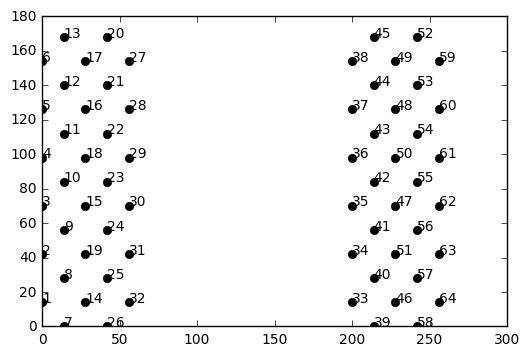

In [14]:
for k, v in site_groups.items():
    for kk, vv in v['geometry'].items():
        plt.plot(vv[0], vv[1], 'ko')
        plt.text(vv[0], vv[1], str(kk))

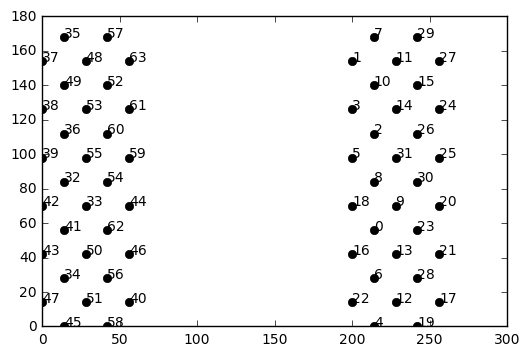

In [18]:
for k, v in channel_groups.items():
    for kk, vv in v['geometry'].items():
        plt.plot(vv[0], vv[1], 'ko')
        plt.text(vv[0], vv[1], str(kk))

In [20]:
f = open('/home/cdw291/probes/whisper/A2x32-Poly5_whisper_spyking_intan.prb', 'w')
# pickle.dump(channel_groups, f, 0)
f.write("channel_groups = {0}".format(channel_groups.__str__()))
f.close()